In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

#https://colab.research.google.com/github/JeroenMulkers/mumax3-tutorial/blob/master/postprocessing.ipynb#scrollTo=apKunwIp0s6_
def read_mumax3_ovffiles(outputdir):
    """Load all ovffiles in outputdir into a dictionary of numpy arrays 
    with the ovffilename (without extension) as key"""
    
    from subprocess import run, PIPE, STDOUT
    from glob import glob
    from os import path
    from numpy import load

    # convert all ovf files in the output directory to numpy files
    """p = run(["mumax3-convert","-numpy",outputdir+"/*.ovf"], stdout=PIPE, stderr=STDOUT)
    if p.returncode != 0:
        print(p.stdout.decode('UTF-8'))"""

    # read the numpy files (the converted ovf files)
    fields = {}
    for npyfile in glob(outputdir+"/*.npy"):
        key = path.splitext(path.basename(npyfile))[0]
        fields[key] = load(npyfile)
    
    return fields


def show_abs_my(m):
    my_abs = np.abs( m[1,0,:,:] )
    plt.figure()
    plt.imshow(my_abs, vmin=0, vmax=1)
    plt.show()


files=read_mumax3_ovffiles("run.out")

snapshots=[files[fileName] for fileName in sorted(files.keys())]
m = np.stack(snapshots)
#m[snapshotIndex, ic, iz, iy, ix]

In [1]:
n=len(snapshots)
dt=2e-13
height=len(m[0][0][0])
width=len(m[0][0][0][0])

freqs=np.fft.fftfreq(n,dt)[:n//2]


frequencies=np.zeros((height,width,len(freqs)),dtype=np.float64)
for y in range(height):
    for x in range(width):
        if m[0,0,0,y,x]==0 and m[0,1,0,y,x]==0:
            continue
            pass
        xData=m[:,0,2,y,x]
        yData=m[:,1,2,y,x]

        xFFT=np.fft.fft(xData)[:n//2]
        yFFT=np.ffft.fft(yData)[:n//2]
        frequencies[y][x]=np.abs(xFFT)
        


NameError: name 'snapshots' is not defined

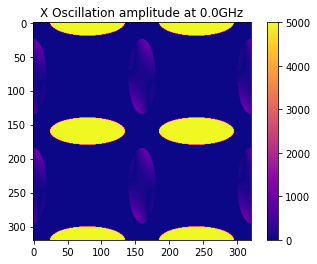

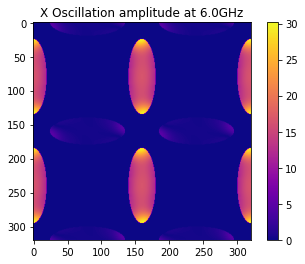

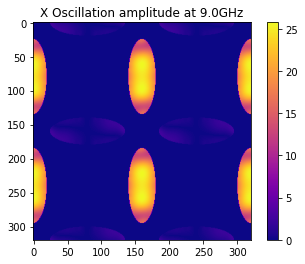

[0.00000000e+00 9.99600160e+08 1.99920032e+09 ... 2.49700120e+12
 2.49800080e+12 2.49900040e+12]


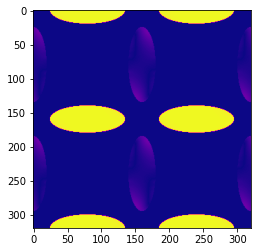

In [28]:


peakFreqsI=np.argsort(-frequencies,axis=2)
peakFreqs=freqs[peakFreqsI]
plt.imshow(peakFreqs[:,:,0])


uniquePeaksI=np.unique(peakFreqsI[:,:,0])

for i in uniquePeaksI:
    plt.imshow(np.abs(frequencies[:,:,i]),cmap="plasma")
    plt.title(f"X Oscillation amplitude at {round(freqs[i]*1e-9,2)}GHz")
    plt.colorbar()
    plt.show()


plt.imshow(np.abs(frequencies[:,:,0]),cmap="plasma")
print(freqs)